In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import re
import wnutils.xml as wx

In [2]:
all_entrances = pd.read_csv('data/StationEntrances.csv')

In [3]:
all_entrances = all_entrances.loc[:,['Station_Name','Station_Latitude','Station_Longitude']]

In [4]:
all_entrances = all_entrances.drop_duplicates()

In [5]:
all_entrances = all_entrances.reset_index(drop=True)

In [7]:
sample_entrances = pd.read_csv('data/SFE_SAMPLE210.csv')
sample_entrances2 = pd.read_csv('data/SFE_SAMPLE295.csv')
sample_entrances3 = pd.read_csv('data/SFE_SAMPLE296.csv')
sample_entrances4 = pd.read_csv('data/SFE_SAMPLE297.csv')
sample_entrances5 = pd.read_csv('data/SFE_SAMPLE299.csv')

In [8]:
def combine(sample_entrances, all_entrances):
    sample_entrances = sample_entrances.loc[:,['staname']]
    combined = {}
    station_name = []
    longitude = []
    latitude = []
    unread = []
    for i in range(0,len(sample_entrances.index)):
        for j in range(0,len(all_entrances.index)):
            read = False
            if i == 0:
                break
            if sample_entrances.loc[i,'staname'][:int(len(sample_entrances.loc[i,'staname'])/2)] == all_entrances.loc[j,'Station_Name'][:int(len(sample_entrances.loc[i,'staname'])/2)]:
                station_name.append(sample_entrances.loc[i,'staname'])
                longitude.append(all_entrances.loc[j,'Station_Longitude'])
                latitude.append(all_entrances.loc[j,'Station_Latitude'])
                read = True
                break
        if read == False:
            unread.append(sample_entrances.loc[i,'staname'])
    combined = {'station_name': station_name, 'station_lat': latitude, 'station_long': longitude}
    combined_df = pd.DataFrame.from_dict(combined)
    return combined_df

In [9]:
combined_df1 = combine(sample_entrances, all_entrances)
combined_df2 = combine(sample_entrances2, all_entrances)
combined_df3 = combine(sample_entrances3, all_entrances)
combined_df4 = combine(sample_entrances4, all_entrances)
combined_df5 = combine(sample_entrances5, all_entrances)

In [10]:
min_max = []

In [11]:
BBox1 = (combined_df1.station_long.min(), combined_df1.station_long.max(),      
         combined_df1.station_lat.min(), combined_df1.station_lat.max())
BBox2 = (combined_df2.station_long.min(), combined_df2.station_long.max(),      
         combined_df2.station_lat.min(), combined_df2.station_lat.max())
BBox3 = (combined_df3.station_long.min(), combined_df3.station_long.max(),      
         combined_df3.station_lat.min(), combined_df3.station_lat.max())
BBox4 = (combined_df4.station_long.min(), combined_df4.station_long.max(),      
         combined_df4.station_lat.min(), combined_df4.station_lat.max())
BBox5 = (combined_df5.station_long.min(), combined_df5.station_long.max(),      
         combined_df5.station_lat.min(), combined_df5.station_lat.max())

In [12]:
min_max.append(BBox1)
min_max.append(BBox2)
min_max.append(BBox3)
min_max.append(BBox4)
min_max.append(BBox5)

In [13]:
min(min_max)[0]

-74.028398

In [14]:
max(min_max)[1]

-73.793604

In [15]:
min(min_max)[2]

40.586896

In [16]:
max(min_max)[3]

40.883895

In [17]:
BBox = (-74.028398,-73.793604,40.586896,40.883895)

In [18]:
nyc = plt.imread('map.png')

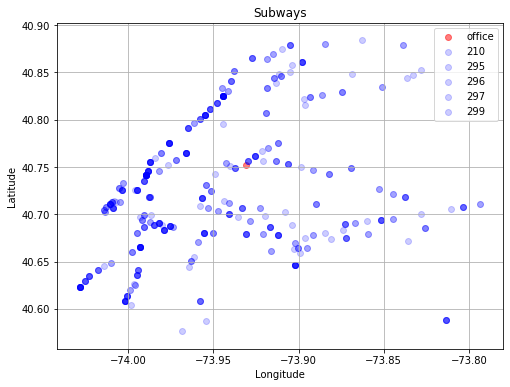

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(-73.930910,40.751710,color='red',alpha=0.5,label = 'office')
plt.scatter(combined_df1['station_long'], combined_df1['station_lat'], color='blue',alpha=0.2,label = '210')
plt.scatter(combined_df2['station_long'], combined_df2['station_lat'], color='blue',alpha=0.2,label = '295')
plt.scatter(combined_df3['station_long'], combined_df3['station_lat'], color='blue',alpha=0.2,label = '296')
plt.scatter(combined_df4['station_long'], combined_df4['station_lat'], color='blue',alpha=0.2,label = '297')
plt.scatter(combined_df5['station_long'], combined_df5['station_lat'], color='blue',alpha=0.2,label = '299')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subways')
plt.grid()

plt.legend()
plt.show()


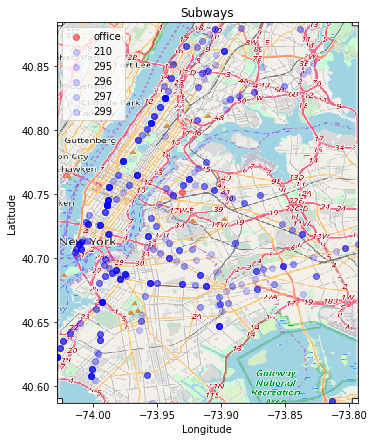

In [20]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(-73.930910,40.751710,color='red',alpha=0.5,label = 'office')
ax.scatter(combined_df1['station_long'], combined_df1['station_lat'], color='blue',alpha=0.2,label = '210')
ax.scatter(combined_df2['station_long'], combined_df2['station_lat'], color='blue',alpha=0.2,label = '295')
ax.scatter(combined_df3['station_long'], combined_df3['station_lat'], color='blue',alpha=0.2,label = '296')
ax.scatter(combined_df4['station_long'], combined_df4['station_lat'], color='blue',alpha=0.2,label = '297')
ax.scatter(combined_df5['station_long'], combined_df5['station_lat'], color='blue',alpha=0.2,label = '299')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Subways')
# plt.grid()

ax.legend()
# plt.show()
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nyc, zorder=0, extent = BBox, aspect= 'equal')
